<a href="https://colab.research.google.com/github/CLAUDERNORONHA/MACHINE/blob/main/ANALISE_BITCOIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bitcoin é uma rede descentralizada e moeda digital que usa um sistema ponto a ponto para verificar e processar transações.


**Previsão de preço de bitcoin**

Recentemente, o Bitcoin tem recebido muita atenção da mídia e do público devido ao recente aumento de preço. Como o Bitcoin tem sido visto como um ativo financeiro e é negociado por meio de muitas bolsas de criptomoedas, como um mercado de ações, muitos pesquisadores estudaram vários fatores que afetam o preço do Bitcoin e os padrões por trás de suas flutuações usando vários métodos analíticos e preditivos.

Neste artigo, estarei usando o modelo do Profeta do Facebook para a tarefa de previsão de preços do Bitcoin usando aprendizado de máquina com Python.


A Biblioteca do Profeta do Facebook é um modelo de regressão aditiva de código aberto disponibilizado pelo Facebook para previsões de séries temporais. Embora exista uma versão mais avançada do Profeta, como NeuralProphet, que é baseada em redes neurais, estarei usando a versão simplificada que usa técnicas de aprendizado de máquina para a tarefa de previsão de preços do Bitcoin. Se você quiser saber mais sobre como funciona o modelo do Profeta do Facebook.


Agora, nesta seção, apresentarei um projeto de aprendizado de máquina no Bitcoin Price Prediction. A primeira etapa é baixar os dados. Agora, vamos ver como fazer o download dos dados mais recentes de preços de bitcoin:


Base de dados = https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD


Agora, depois de baixar os dados, é hora de importar as bibliotecas Python necessárias e o conjunto de dados. Antes de importar as bibliotecas, certifique-se de ter instalado o modelo fbprophet. Você pode instalá-lo facilmente usando um comando pip; pip install fbprophet. Agora vamos importar as bibliotecas:

In [ ]:
import pandas as pd
import numpy as np

from fbprophet import Prophet

O modelo do Profeta do Facebook funciona apenas com dados que contêm um formato de série de tempo de string em uma coluna chamada “ds” e valores contínuos em uma coluna chamada “y”. Portanto, precisamos criar os dados de acordo:

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/1-CIENCIA DE DADOS-CURSOS_ESTUDO DE CASO/MACHINE COM PYTHON/FINANCAS/BTC-USD.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-28,9048.460938,9197.546875,8975.525391,9143.582031,9143.582031,1.456087e+10
1,2020-06-29,9140.029297,9237.573242,9041.875977,9190.854492,9190.854492,1.646055e+10
2,2020-06-30,9185.581055,9217.835938,9084.837891,9137.993164,9137.993164,1.573580e+10
3,2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,1.597155e+10
4,2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,1.633892e+10


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2021-06-24,33682.800781,35228.851563,32385.214844,34662.437500,34662.437500,3.312337e+10
362,2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,4.023090e+10
363,2021-06-26,31594.664063,32637.587891,30184.501953,32186.277344,32186.277344,3.858539e+10
364,2021-06-27,32287.523438,34656.128906,32071.757813,34649.644531,34649.644531,3.551164e+10
365,2021-06-28,34767.632813,35152.128906,33953.578125,34231.335938,34231.335938,3.535760e+10


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,29575.884938,30491.087810,28535.884491,29638.261536,29638.261536,4.488337e+10
std,17979.082495,18551.037070,17251.670620,17946.795654,17946.795654,2.681234e+10
min,9048.460938,9162.183594,8975.525391,9073.942383,9073.942383,1.225260e+10
25%,11633.405274,11795.585938,11408.441894,11670.293457,11670.293457,2.560521e+10
50%,27081.810547,28288.839844,26207.640625,27362.437500,27362.437500,4.085632e+10
75%,46593.199219,48417.126953,45141.027344,46620.646485,46620.646485,5.844105e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [ ]:
df = df[["Date", "Close"]]

In [ ]:
#Agora vamos renomear as colunas


df.columns = ["ds", "y"]

In [ ]:
print(df)

             ds             y
0    2020-06-28   9143.582031
1    2020-06-29   9190.854492
2    2020-06-30   9137.993164
3    2020-07-01   9228.325195
4    2020-07-02   9123.410156
..          ...           ...
361  2021-06-24  34662.437500
362  2021-06-25  31637.779297
363  2021-06-26  32186.277344
364  2021-06-27  34649.644531
365  2021-06-28  34231.335938

[366 rows x 2 columns]


Agora vamos ajustar os dados em nosso modelo:

In [ ]:
prophet = Prophet()

In [ ]:
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Agora vamos fazer previsões. O método make_future_dataframe no modelo do Profeta tem um parâmetro denominado 'períodos', podemos usá-lo para definir a quantidade de tempo que precisamos para fazer previsões. Agora vamos fazer previsões para os próximos 365 dias:

In [ ]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-06-28
1   2020-06-29
2   2020-06-30
3   2020-07-01
4   2020-07-02
..         ...
726 2022-06-24
727 2022-06-25
728 2022-06-26
729 2022-06-27
730 2022-06-28

[731 rows x 1 columns]


In [ ]:
# Agora vamos fazer a previsão 

forecast = prophet.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2021-12-11,-29462.082324,-53011.470166,-5460.554977
532,2021-12-12,-29927.579272,-53170.578776,-4544.387783
533,2021-12-13,-30214.271005,-54023.111652,-4864.640455
534,2021-12-14,-30623.996034,-54552.610459,-5208.778537
535,2021-12-15,-30946.063963,-54611.384044,-6082.051868
...,...,...,...,...
726,2022-06-24,-100450.118455,-178059.742914,-17692.712338
727,2022-06-25,-100822.969223,-178016.508548,-18811.892423
728,2022-06-26,-101288.466171,-178416.060087,-18027.002867
729,2022-06-27,-101575.157904,-178141.398026,-17564.882255


Agora vamos traçar nossas previsões:

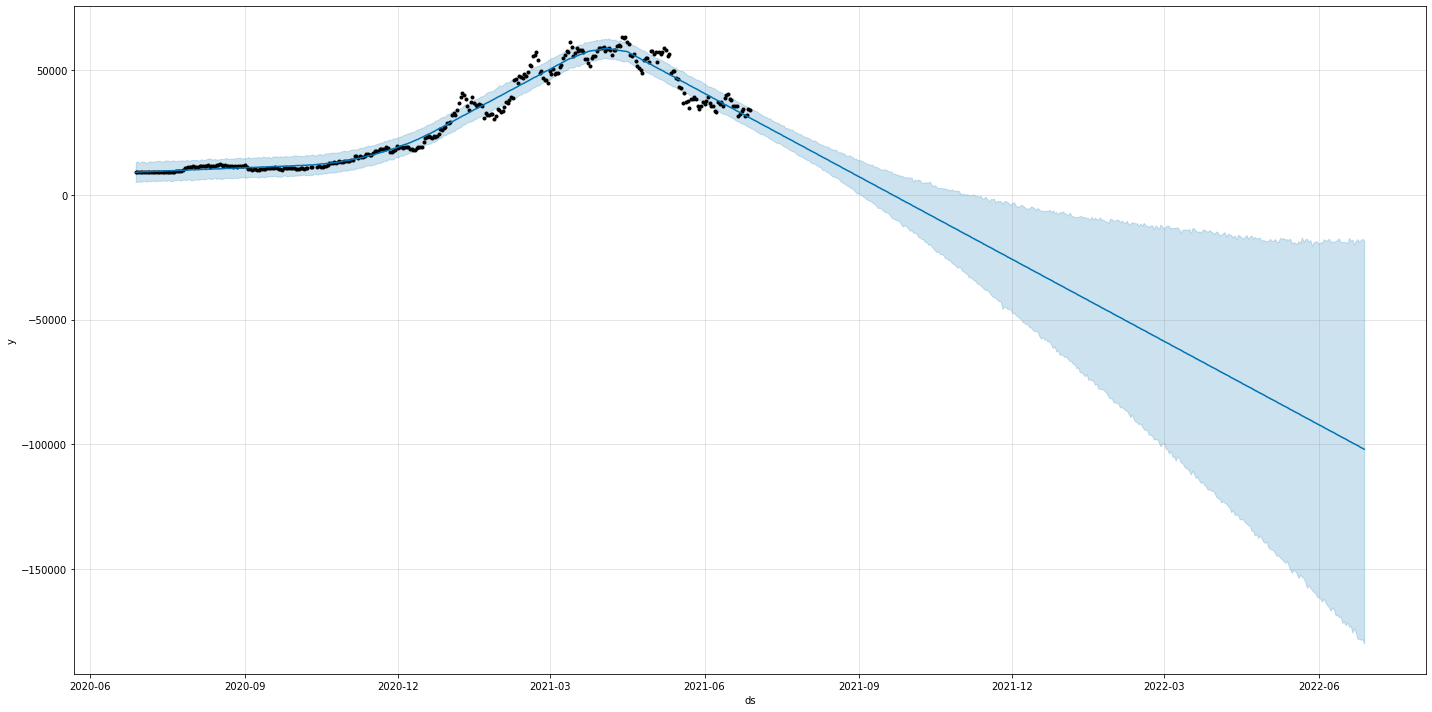

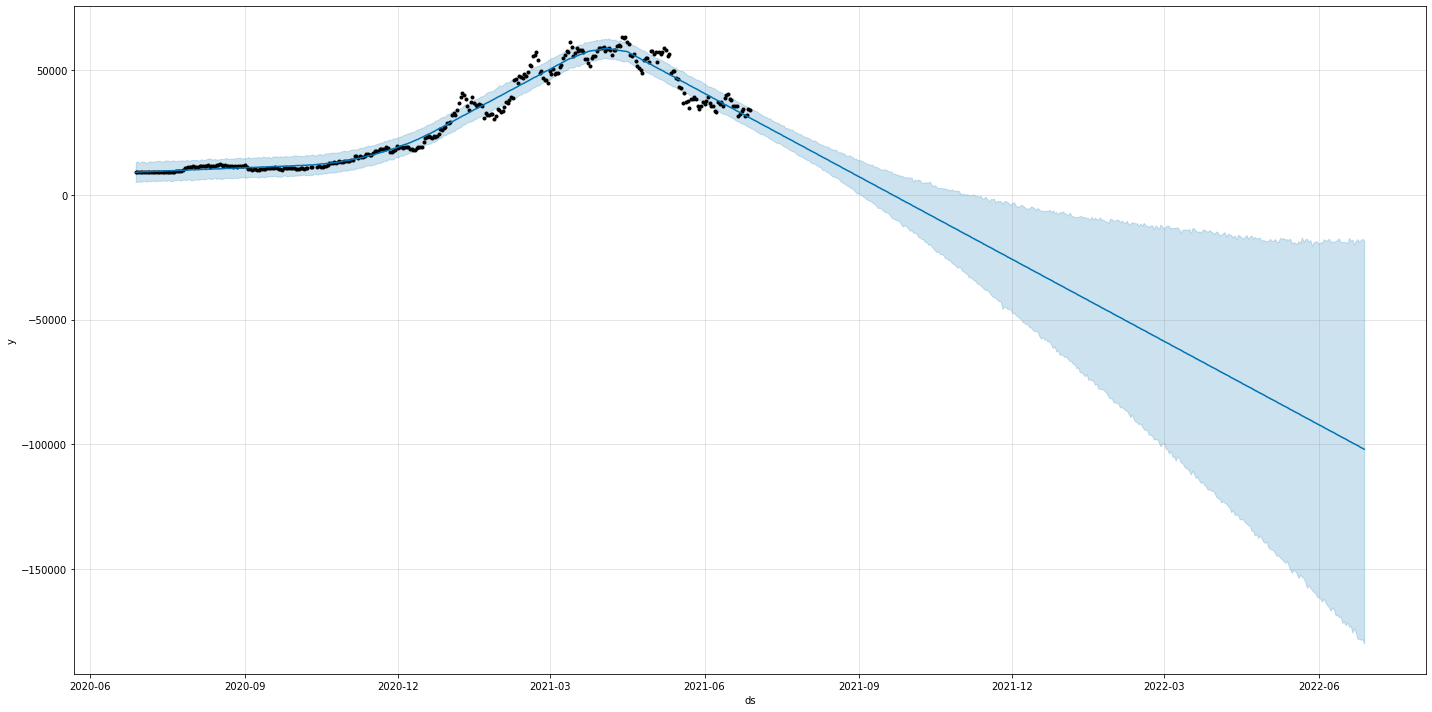

In [ ]:
from fbprophet.plot import plot

prophet.plot(forecast, figsize=(20,10))

Conclusão
Existem várias interpretações das previsões calculadas pelo modelo do profeta do Facebook, como o ímpeto atual para os preços do bitcoin despencou e, ainda assim, é provável que vejamos uma queda mais brusca durante esse sementre de 2021.